# Solving Travel Salesman Problem with heuristics

## Creating the graph

In [1]:
import networkx as nx
import matplotlib as plt

In [2]:
pvc = nx.Graph()
pvc.add_nodes_from([1,2,3,4,5,6])

In [3]:
edges = {}
w = 10;
for i in range(1,7) :
    for j in range(i+1 , 7):
        pvc.add_edge(i,j,weight = w)
        pvc[i][j]['weight'] = w
        edges[(i,j)] = w
        w =w+1

{(1, 2): Text(-0.5511878618433211, -0.5819028298051382, '10'),
 (1, 3): Text(0.18257081574127004, -0.7627108917280765, '11'),
 (1, 4): Text(-0.36952866763468123, -0.19951602679719738, '12'),
 (1, 5): Text(0.2583520771668982, -0.3696406173379946, '13'),
 (1, 6): Text(-0.0005316088964318066, -0.08622963433159381, '14'),
 (2, 3): Text(-0.12845442336891788, -0.3446137215332147, '15'),
 (2, 4): Text(-0.6805539067448692, 0.2185811433976644, '16'),
 (2, 5): Text(-0.05267316194328975, 0.048456552856867174, '17'),
 (2, 6): Text(-0.31155684800661976, 0.331867535863268, '18'),
 (3, 4): Text(0.053204770839722054, 0.03777308147472619, '19'),
 (3, 5): Text(0.6810855156413015, -0.13235150906607104, '20'),
 (3, 6): Text(0.4222018295779715, 0.15105947394032976, '21'),
 (4, 5): Text(0.1289860322653502, 0.43084335586480804, '22'),
 (4, 6): Text(-0.1298976537979798, 0.7142543388712088, '23'),
 (5, 6): Text(0.4979830910035996, 0.5441297483304116, '24')}

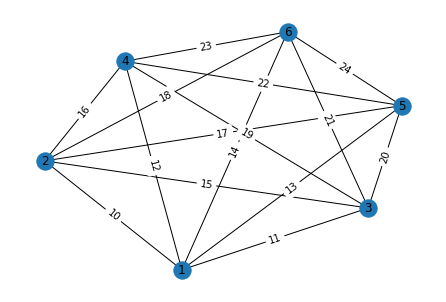

In [4]:
label_edges = {}
for edge in edges: 
    label_edges[edge] = edges[edge]


pos = nx.spring_layout(pvc)
nx.draw(pvc , pos)
nx.draw_networkx_labels(pvc , pos , labels ={node : node for node in pvc.nodes() })
nx.draw_networkx_edge_labels(pvc , pos , edge_labels =label_edges)

## Bruteforcing the cycles

In [5]:
from itertools  import permutations
possibilities = list(permutations([1,2,3,4,5,6],6))
allCycles = {}
for cycle in possibilities :
    cycle_list = list(cycle)
    a = cycle_list[0]
    b = cycle_list[5]
    allCycles[cycle] = pvc[min(a,b)][max(a,b)]['weight']
    for x in range(0,5):
        a = cycle_list[x]
        b = cycle_list[x+1]
        allCycles[cycle] = allCycles[cycle] + pvc[min(a,b)][max(a,b)]['weight']

allCycles[min(allCycles,key= allCycles.get)]
key = min(allCycles,key= allCycles.get)
key


(1, 4, 2, 5, 3, 6)

{1: Text(0.5216878082520527, 0.8808755971813212, '1'),
 2: Text(-1.0, -0.024413119928227766, '2'),
 3: Text(0.497598283675199, -0.8196912790897131, '3'),
 4: Text(-0.5746391130957653, 0.8576321812001776, '4'),
 5: Text(-0.43132195901283604, -0.8368764121188407, '5'),
 6: Text(0.9866749801813466, -0.05752696724471514, '6')}

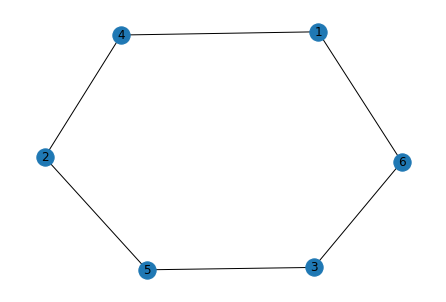

In [18]:
graph = nx.Graph()
graph.add_nodes_from([1,2,3,4,5,6])
list_key = list(key)

for x in range(0,6):
    a = list_key[x]
    b = list_key[(x+1) % 6]
    graph.add_edge(a,b , weight =pvc[min(a,b)][max(a,b)]['weight'] )
pos = nx.spring_layout(graph)
nx.draw(graph , pos)
nx.draw_networkx_labels(graph , pos , labels ={node : node for node in graph.nodes() })

In [19]:
allCycles[min(allCycles,key= allCycles.get)]

100

## Using Kruskal method

{(1, 2): Text(-0.7094967490054074, 0.4839908817823111, '10'),
 (1, 3): Text(0.11527696631812603, 0.8516696288919253, '11'),
 (2, 4): Text(-0.7378878379678553, -0.4061298377093995, '16'),
 (3, 5): Text(0.7623236824866269, 0.31559150024577004, '20'),
 (4, 6): Text(-0.052826933481219335, -0.7995823820280807, '23'),
 (5, 6): Text(0.6226108716497294, -0.4455397911825255, '24')}

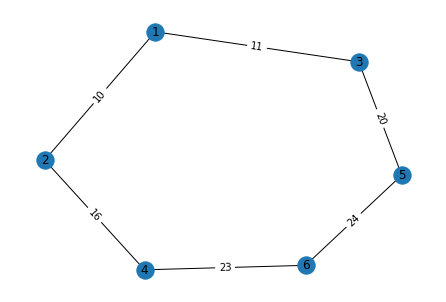

In [6]:
cycle = nx.Graph()
for edge in edges : 
    (x,y) = edge
    if not cycle.has_node(x):
        if not cycle.has_node(y):
            cycle.add_edge(x,y,weight = edges[edge])
        else:
            if not cycle.degree()[y] >=2 :
                cycle.add_edge(x,y,weight = edges[edge])
    else : 
        if not cycle.degree()[x] >=2 :
            if not cycle.has_node(y):
                cycle.add_edge(x,y,weight = edges[edge])
    
    if (cycle.number_of_nodes() != pvc.number_of_nodes()) :
        
        if (len(nx.cycle_basis(cycle)) != 0) :
            cycle.remove_edge(x,y)
    else :
        cycle.add_edge(x,y,weight = edges[edge])

edges = cycle.edges()
label_edges = {}
for edge in edges: 
    label_edges[edge] =edges[edge]['weight']

pos = nx.spring_layout(cycle)
nx.draw(cycle , pos)
nx.draw_networkx_labels(cycle , pos , labels ={node : node for node in cycle.nodes() })
nx.draw_networkx_edge_labels(cycle , pos , edge_labels =label_edges)

In [7]:
path_length = 0
for edge in cycle.edges() : 
    path_length = path_length + cycle.edges()[edge]['weight']

path_length

104